In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
columns_to_convert_category = ['Attrition', 'OverTime']
df[columns_to_convert_category] = df[columns_to_convert_category].applymap({'Yes': 1, 'No': 0}.get)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
columns_to_convert = ['PercentSalaryHike', 'YearsInCurrentRole','DistanceFromHome']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric)

print(df.dtypes)
print(df)

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                     int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
unique_value_jobrole = df['JobRole'].unique()
unique_value_Department = df['Department'].unique()
print(unique_value_Department)

['Sales' 'Research & Development' 'Human Resources']


In [9]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['MaritalStatus'] = df['MaritalStatus'].map({'Single':1, 'Married':2, 'Divorced':0})
df['Department'] = df['Department'].map({'Human Resources':2, 'Sales': 1, 'Research & Development': 0})
df['JobRole'] = df['JobRole'].map({'Sales Executive':0, 'Research Scientist':1, 'Laboratory Technician':2, 'Manufacturing Director':3,
                                   'Healthcare Representative':4, 'Manager':5, 'Sales Representative':6, 'Research Director':7, 'Human Resources':8})
# print(df['Department'])

In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
print(df.dtypes)

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                   int64
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                       int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                      int64
JobSatisfaction              int64
MaritalStatus                int64
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                     int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [12]:
# features = ['PercentSalaryHike','YearsInCurrentRole','DistanceFromHome','Age','DailyRate','EnvironmentSatisfaction',\
#            'JobSatisfaction','JobInvolvement','JobLevel','MonthlyIncome','NumCompaniesWorked','YearsSinceLastPromotion','Attrition','OverTime']

features = ['Age', 'Attrition','DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',\
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction','MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',\
        'OverTime', 'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel','TotalWorkingYears',\
        'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

df_log_transformed = df[features].apply(lambda x: np.log1p(x))

In [13]:
df_log_transformed

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3.737670,0.693147,0.693147,1.098612,0.693147,1.098612,0.000000,4.553877,1.386294,1.098612,...,0.693147,4.394449,0.000000,2.197225,0.000000,0.693147,1.945910,1.609438,0.000000,1.791759
1,3.912023,0.000000,2.197225,0.693147,0.693147,1.386294,0.693147,4.127134,1.098612,1.098612,...,1.609438,4.394449,0.693147,2.397895,1.386294,1.386294,2.397895,2.079442,0.693147,2.079442
2,3.637586,0.693147,1.098612,1.098612,0.693147,1.609438,0.693147,4.532599,1.098612,0.693147,...,1.098612,4.394449,0.000000,2.079442,1.386294,1.386294,0.000000,0.000000,0.000000,0.000000
3,3.526361,0.000000,1.386294,1.609438,0.693147,1.609438,0.000000,4.043051,1.386294,0.693147,...,1.386294,4.394449,0.000000,2.197225,1.386294,1.386294,2.197225,2.079442,1.386294,0.000000
4,3.332205,0.000000,1.098612,0.693147,0.693147,0.693147,0.693147,3.713572,1.386294,0.693147,...,1.609438,4.394449,0.693147,1.945910,1.386294,1.386294,1.098612,1.098612,1.098612,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,3.610918,0.000000,3.178054,1.098612,0.693147,1.386294,0.693147,3.737670,1.609438,1.098612,...,1.386294,4.394449,0.693147,2.890372,1.386294,1.386294,1.791759,1.098612,0.000000,1.386294
1466,3.688879,0.000000,1.945910,0.693147,0.693147,1.609438,0.693147,3.761200,1.098612,1.386294,...,0.693147,4.394449,0.693147,2.302585,1.791759,1.386294,2.079442,2.079442,0.693147,2.079442
1467,3.332205,0.000000,1.609438,1.386294,0.693147,1.098612,0.693147,4.477337,1.609438,1.098612,...,1.098612,4.394449,0.693147,1.945910,0.000000,1.386294,1.945910,1.098612,0.000000,1.386294
1468,3.912023,0.000000,1.098612,1.386294,0.693147,1.609438,0.693147,4.158883,1.098612,1.098612,...,1.609438,4.394449,0.000000,2.890372,1.386294,1.098612,2.302585,1.945910,0.000000,2.197225


In [14]:
len(features)

29

In [15]:
sse = pd.Series(range(28),index = range(1,29))
for i in range(1,29):
    model = KMeans(n_clusters=i)
    model.fit(df_log_transformed)
    sse[i] = model.inertia_
print(sse)

1     10521.015052
2      8332.582719
3      7605.644309
4      7143.427114
5      6802.217642
6      6509.214681
7      6253.674068
8      6038.855582
9      5866.193340
10     5724.404939
11     5624.340130
12     5525.886941
13     5446.751122
14     5377.273241
15     5296.245259
16     5229.758512
17     5177.887574
18     5111.853686
19     5044.826128
20     5020.471318
21     4970.207710
22     4919.917519
23     4882.050062
24     4838.698444
25     4790.424553
26     4762.331596
27     4722.223857
28     4703.455287
dtype: float64


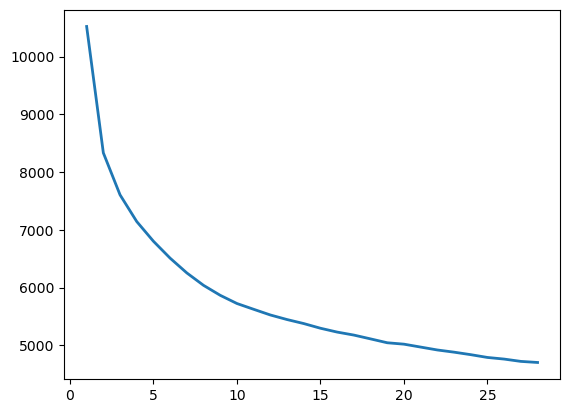

In [16]:
plt.plot(sse.index, sse, linewidth=2.0)

                                  PCA1          PCA2
Age                      -6.619597e-02  1.175308e-01
Attrition                 3.831748e-02 -2.986008e-02
DistanceFromHome         -3.351483e-03 -6.159190e-01
Education                -1.925197e-02  3.429997e-02
EnvironmentSatisfaction  -2.060699e-03 -5.380998e-03
Gender                    1.061091e-02 -1.481429e-02
HourlyRate                7.265004e-03 -9.538433e-04
JobInvolvement           -2.811386e-03 -6.060488e-03
JobLevel                 -1.360809e-01  1.650976e-01
JobRole                  -2.686367e-02  3.039173e-01
JobSatisfaction           1.881202e-03 -8.726467e-03
MaritalStatus            -5.111635e-03 -1.358830e-02
MonthlyIncome            -2.769583e-01  3.474888e-01
MonthlyRate               1.256642e-02  1.687920e-02
NumCompaniesWorked        1.567654e-02  4.201266e-01
OverTime                  6.407020e-03 -5.933547e-03
PercentSalaryHike         5.755400e-03 -4.205339e-03
PerformanceRating        -5.425758e-04 -1.7270

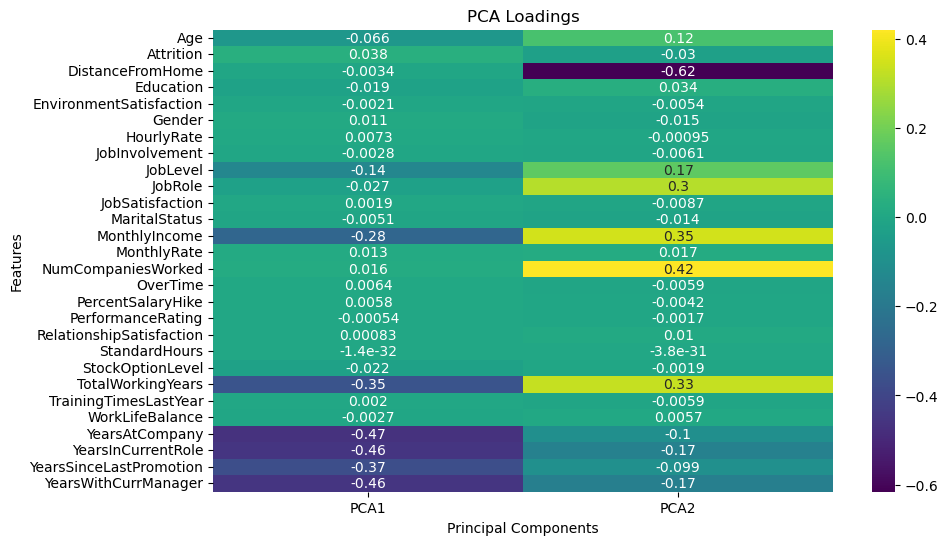

In [17]:
features = ['Age', 'Attrition','DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',\
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction','MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',\
        'OverTime', 'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel','TotalWorkingYears',\
        'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

df_log_transformed = df[features].apply(lambda x: np.log1p(x))

pca = PCA(n_components=2)  # Adjust n_components as needed
pca.fit(df_log_transformed)

loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings, columns=['PCA1', 'PCA2'], index=features)
print(loadings_df)

# Plot the loadings
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap='viridis')
plt.title('PCA Loadings')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()

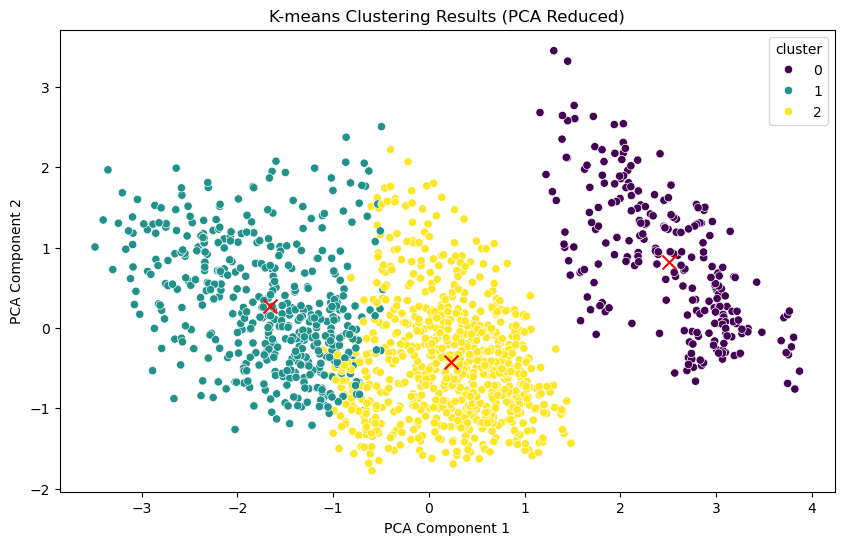

In [19]:
# Fit K-means with the chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
kmeans.fit(df_log_transformed)
df_log_transformed['cluster'] = kmeans.labels_

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_log_transformed)

# Create a DataFrame with PCA results
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = df_log_transformed['cluster']

# Get centroids in the original space
centroids = kmeans.cluster_centers_

# Transform centroids to PCA space
centroids_pca = pca.transform(centroids)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df_pca, palette='viridis', legend='full')

# Plot centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=100, label='Centroids')

plt.title('K-means Clustering Results (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [20]:
#drop other features close to 0
features_1 = ['Age', 'Attrition','DistanceFromHome', 'EnvironmentSatisfaction','JobLevel', 'JobRole', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',\
        'OverTime', 'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StockOptionLevel','TotalWorkingYears',\
              'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

df_log_transformed_1 = df[features_1].apply(lambda x: np.log1p(x))

In [21]:
sse = pd.Series(range(18),index = range(1,19))
for i in range(1,19):
    model = KMeans(n_clusters=i)
    model.fit(df_log_transformed_1)
    sse[i] = model.inertia_
print(sse)

1     9295.603018
2     7108.670826
3     6382.303929
4     5920.357834
5     5580.952511
6     5289.980760
7     5034.359208
8     4824.750275
9     4651.786090
10    4509.647228
11    4399.043459
12    4308.820909
13    4237.858196
14    4155.056643
15    4099.666576
16    4014.145759
17    3961.892875
18    3899.793279
dtype: float64


In [22]:
features_1 = ['Age', 'Attrition','DistanceFromHome', 'EnvironmentSatisfaction','JobLevel', 'JobRole', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',\
        'OverTime', 'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StockOptionLevel','TotalWorkingYears',\
              'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

df_log_transformed_1 = df[features_1].apply(lambda x: np.log1p(x))

                              PCA1      PCA2
Age                      -0.066072  0.113798
Attrition                 0.038323 -0.030323
DistanceFromHome         -0.003318 -0.644993
EnvironmentSatisfaction  -0.002068 -0.005062
JobLevel                 -0.136030  0.160096
JobRole                  -0.026920  0.301997
MonthlyIncome            -0.276856  0.337580
MonthlyRate               0.012567  0.013931
NumCompaniesWorked        0.016056  0.404958
OverTime                  0.006412 -0.006683
PercentSalaryHike         0.005759 -0.004372
PerformanceRating        -0.000546 -0.001700
RelationshipSatisfaction  0.000819  0.009764
StockOptionLevel         -0.022491 -0.003586
TotalWorkingYears        -0.345877  0.318515
YearsAtCompany           -0.468625 -0.100807
YearsInCurrentRole       -0.457211 -0.161794
YearsSinceLastPromotion  -0.373133 -0.094156
YearsWithCurrManager     -0.458002 -0.168165


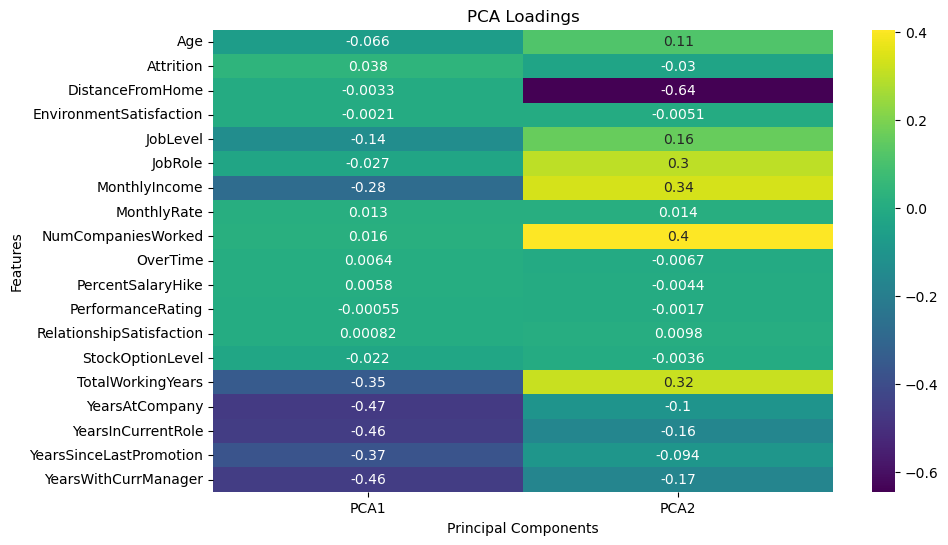

In [23]:
pca = PCA(n_components=2)  # Adjust n_components as needed
pca.fit(df_log_transformed_1)

loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings, columns=['PCA1', 'PCA2'], index=features_1)
print(loadings_df)

# Plot the loadings
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap='viridis')
plt.title('PCA Loadings')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()

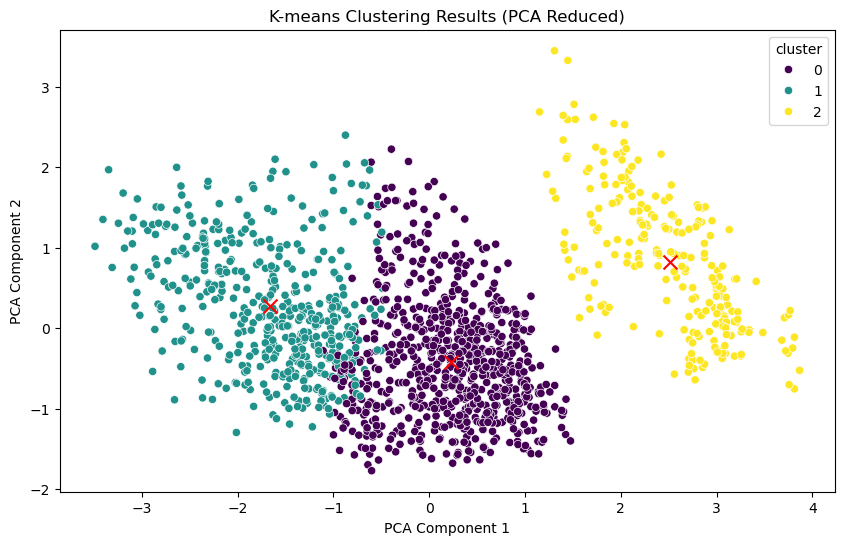

In [25]:
# Fit K-means with the chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
kmeans.fit(df_log_transformed_1)
df_log_transformed_1['cluster'] = kmeans.labels_

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_log_transformed_1)

# Create a DataFrame with PCA results
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = df_log_transformed_1['cluster']

# Get centroids in the original space
centroids_1 = kmeans.cluster_centers_

# Transform centroids to PCA space
centroids_pca_1 = pca.transform(centroids_1)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df_pca, palette='viridis', legend='full')

# Plot centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=100, label='Centroids')

plt.title('K-means Clustering Results (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [26]:
# Compute the magnitudes
loadings_df['|PCA1|'] = loadings_df['PCA1'].abs()
loadings_df['|PCA2|'] = loadings_df['PCA2'].abs()

# Rank features by the magnitudes
significant_features_pca1 = loadings_df.sort_values(by='|PCA1|', ascending=False)
significant_features_pca2 = loadings_df.sort_values(by='|PCA2|', ascending=False)

print("Significant features for PCA 1:\n", significant_features_pca1)
print("Significant features for PCA 2:\n", significant_features_pca2)

Significant features for PCA 1:
                               PCA1      PCA2    |PCA1|    |PCA2|
YearsAtCompany           -0.468625 -0.100807  0.468625  0.100807
YearsWithCurrManager     -0.458002 -0.168165  0.458002  0.168165
YearsInCurrentRole       -0.457211 -0.161794  0.457211  0.161794
YearsSinceLastPromotion  -0.373133 -0.094156  0.373133  0.094156
TotalWorkingYears        -0.345877  0.318515  0.345877  0.318515
MonthlyIncome            -0.276856  0.337580  0.276856  0.337580
JobLevel                 -0.136030  0.160096  0.136030  0.160096
Age                      -0.066072  0.113798  0.066072  0.113798
Attrition                 0.038323 -0.030323  0.038323  0.030323
JobRole                  -0.026920  0.301997  0.026920  0.301997
StockOptionLevel         -0.022491 -0.003586  0.022491  0.003586
NumCompaniesWorked        0.016056  0.404958  0.016056  0.404958
MonthlyRate               0.012567  0.013931  0.012567  0.013931
OverTime                  0.006412 -0.006683  0.006412  0